In [12]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.metrics import log_loss, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
class SGDRegressor(BaseEstimator):
    def __init__(self, eta=1e-3, n_epoch=3):
        self.eta  = eta
        self.n_epoch = n_epoch
        self.mse_ = []
        self.weights_ = []
    
    def fit(self, X, y):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        w = np.zeros(X.shape[1])
        
        for it in tqdm(range(self.n_epoch)):
            for i in range(X.shape[0]):
                new_w = w.copy()
                new_w[0] += self.eta * (y[i] - w.dot(X[i, :]))
                for j in range(1, X.shape[1]):
                    new_w[j] += self.eta * (y[i] - w.dot(X[i, :])) * X[i,j]
                w = new_w.copy()
                
                self.weights_.append(w)
                self.mse_.append(mean_squared_error(y, X.dot(w)))
        self.w_ = self.weights_[np.argmin(self.mse_)]
        
        return self
    
    def predict(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        return X.dot(self.w_)

In [5]:
url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/weights_heights.csv'
df = pd.read_csv(url)
df.head()

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


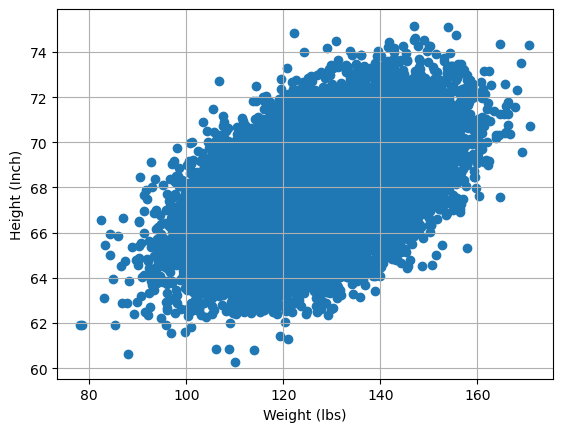

In [9]:
plt.scatter(df.Weight, df.Height)
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
plt.grid()

In [14]:
X, y = df.Weight.values, df.Height.values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1,1]))
X_test_scaled = scaler.transform(X_test.reshape([-1,1]))

In [19]:
sgd = SGDRegressor()
sgd.fit(X_train_scaled, y_train)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:24<00:00,  8.09s/it]


SGDRegressor()

Text(0, 0.5, 'mse')

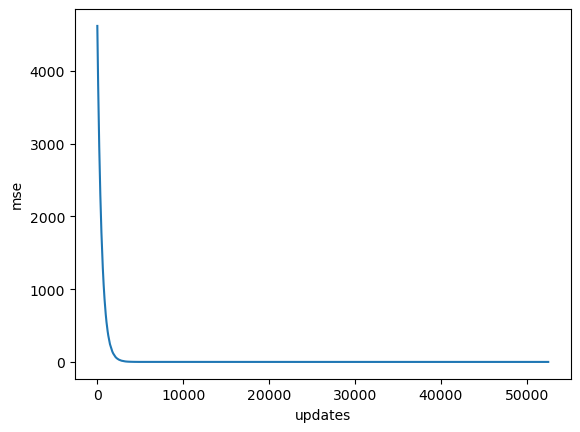

In [21]:
plt.plot(range(len(sgd.mse_)), sgd.mse_)
plt.xlabel('updates')
plt.ylabel('mse')

In [22]:
np.min(sgd.mse_), sgd_reg.w_

(2.6994650393240813, array([67.98776808,  0.96064751]))

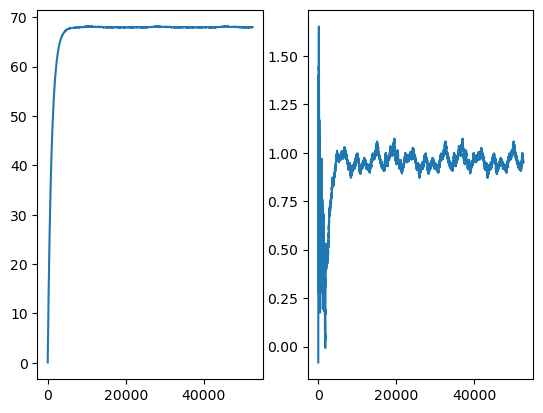

In [29]:
plt.subplot(121)
plt.plot(range(len(sgd.weights_)), [w[0] for w in sgd.weights_])
plt.subplot(122)
plt.plot(range(len(sgd.weights_)), [w[1] for w in sgd.weights_])

In [31]:
sgd_holdout_mse = mean_squared_error(y_test, sgd.predict(X_test_scaled))
sgd_holdout_mse

2.707303564462838

In [33]:
from sklearn.linear_model import LinearRegression

logit = LinearRegression().fit(X_train_scaled, y_train)
print(logit.coef_, logit.intercept_)
logit_holdout_mse = mean_squared_error(y_test, logit.predict(X_test_scaled))
logit_holdout_mse

[0.96012186] 67.987318524


2.707308810071808